In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from ML.EFPs.data_loaders import load_data_top_tagging
from utilities import utilities

In [3]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Trainning/t_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Test/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Test/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Test/t_jets_efps_d5_primed.npy"
)

In [20]:
# defining the model
# d <= 5
# l2, C = 0.04, solver = lbfgs
# l1, C = 0.001, solver = saga
# d <= 7
# l2, C = 0.01, solver = lbfgs
log_reg = LogisticRegression(penalty='l1', C=0.25, solver='saga', max_iter=500)
log_reg.fit(X_train, y_train)

coefs = ', '.join([f'{val:.2f}' for val in log_reg.coef_[0]])
print(f"Coefficients:", coefs)
print(f"Intercept {log_reg.intercept_[0]:.3f}")

Coefficients: 0.79, 99.06, -128.76, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 18.07, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00
Intercept -6.152


In [21]:
print("Non-vanishing coefficients indices:")
best_efps = np.where(abs(log_reg.coef_[0]) > 0)[0]
print(best_efps)

Non-vanishing coefficients indices:
[ 0  1  2 12]


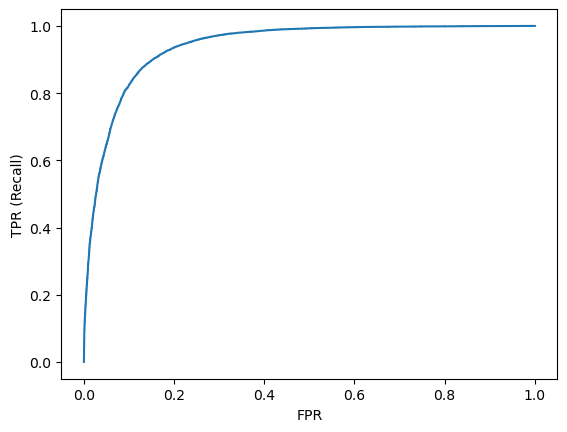

AUC: 0.9407


In [22]:
# roc curve on the validation set
y_score = log_reg.predict_proba(X_val)
utilities.display_roc_curve(y_val, y_score[:, 1])

In [19]:
y_val_predict = log_reg.predict(X_val)

print("Validation set:")
print(f"Recall for Top tagging: {recall_score(y_val, y_val_predict):.2f}")
print(f"Precision for Top tagging: {precision_score(y_val, y_val_predict):.2f}")
print("Confusion Matrix")
print(confusion_matrix(y_val, y_val_predict, labels=[0, 1]))

Validation set:
Recall for Top tagging: 0.89
Precision for Top tagging: 0.87
Confusion Matrix
[[19242  3012]
 [ 2436 20179]]


In [20]:
# Test set
y_test_predict = log_reg.predict(X_test)

print("Test set:")
print(f"Recall for Top tagging: {recall_score(y_test, y_test_predict):.2f}")
print(f"Precision for Top tagging: {precision_score(y_test, y_test_predict):.2f}")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_predict, labels=[0, 1]))

Test set:
Recall for Top tagging: 0.89
Precision for Top tagging: 0.87
Confusion Matrix
[[22611  3567]
 [ 2846 23763]]


In [13]:
# evaluating the probabilities of each sample in the trainning data using 
# K-fold cross validation - it returns the probability of the sample in each class
y_probabilities = cross_val_predict(log_reg, X_train, y_train, cv=6, method='predict_proba')

[]

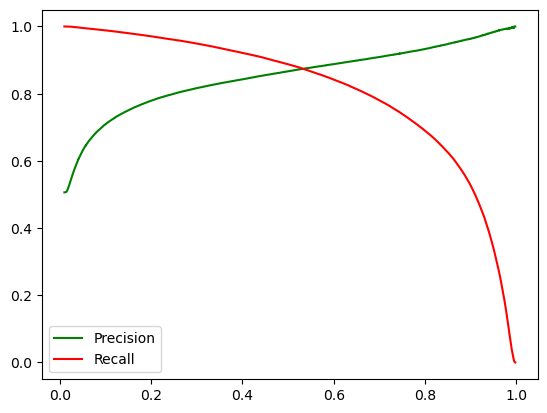

In [14]:
y_score = y_probabilities[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_score)
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.legend(loc='best')
plt.plot()

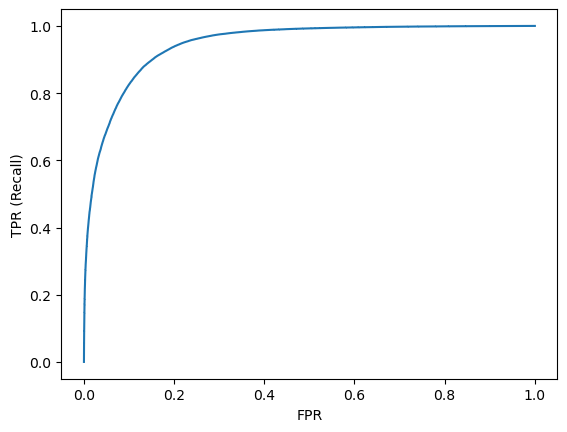

AUC: 0.95


In [15]:
# roc curve for top tagging 
fpr, tpr, thresholds = roc_curve(y_train, y_score)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
plt.show()
print(f"AUC: {auc(fpr, tpr):.2f}")